## Creative building task

Environment

- [ ] Create example categories
- [ ] Create example building blocks
- [ ] Create example payoff
- [ ] Test correlations of payoffs

Agents
- [ ] One Agent try and error learning 


In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In C:\Users\simon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\simon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\simon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\simon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [2]:
rng = np.random.default_rng(0)

### Bulding Blocks (Monster)

**Parts**
- Head
- Body
- Character
- Movement
- Supernatural ability

**Payoff of Parts**
- Scariness
- Entertainment
- Comedic

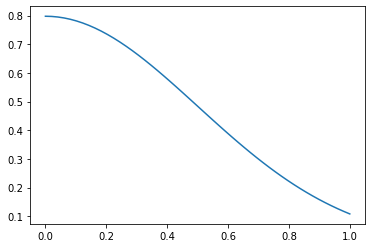

In [3]:
# Unequal part distribution
from scipy.stats import norm
x_range = np.linspace(0,1)
plt.plot(x_range, norm.pdf(x_range, 0, 0.5))


(array([209., 242., 191., 185., 142., 124., 117.,  72.,  55.,  40.]),
 array([4.44312501e-04, 1.00375072e-01, 2.00305832e-01, 3.00236592e-01,
        4.00167352e-01, 5.00098112e-01, 6.00028871e-01, 6.99959631e-01,
        7.99890391e-01, 8.99821151e-01, 9.99751911e-01]),
 <BarContainer object of 10 artists>)

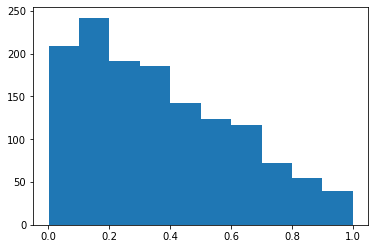

In [4]:
x_amount = rng.normal(0, 0.5, 3000)
x_amount = x_amount[0 <= x_amount]
x_amount = x_amount[x_amount <= 1]
plt.hist(x_amount)


''

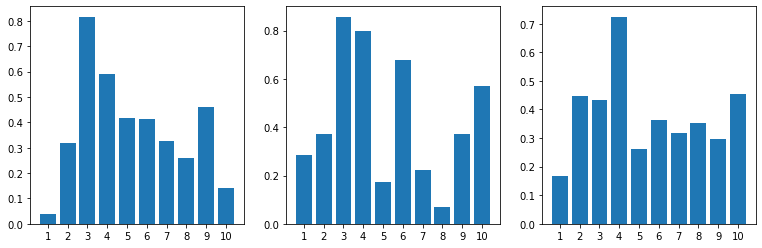

In [5]:
n_parts = 10
heads = x_amount[rng.integers(0, len(x_amount), n_parts)]
bodies = x_amount[rng.integers(0, len(x_amount), n_parts)]
ability = x_amount[rng.integers(0, len(x_amount), n_parts)]

fig, ax = plt.subplots(1,3, figsize=(13,4))
x = np.arange(1, n_parts+1)
ax[0].set_xticks(x)
ax[1].set_xticks(x)
ax[2].set_xticks(x)

ax[0].bar(x, height=heads)
ax[1].bar(x, height=bodies)
ax[2].bar(x, height=ability)
;

''

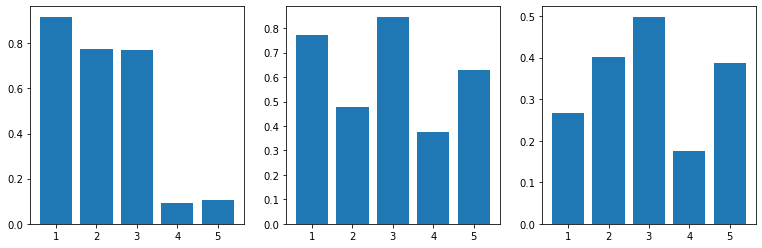

In [6]:
# Starting of with one payoff per part
n_parts = 5
heads = rng.random(n_parts)
bodies = rng.random(n_parts)
ability = rng.random(n_parts)

fig, ax = plt.subplots(1,3, figsize=(13,4))
x = np.arange(1, n_parts+1)
ax[0].set_xticks(x)
ax[1].set_xticks(x)
ax[2].set_xticks(x)

ax[0].bar(x, height=heads)
ax[1].bar(x, height=bodies)
ax[2].bar(x, height=ability)
;

In [7]:
heads = np.stack((x, heads), axis=-1)
bodies = np.stack((x, bodies), axis=-1)
ability = np.stack((x, ability), axis=-1)

In [8]:
monster = np.vstack((rng.choice(heads), rng.choice(bodies), rng.choice(ability)))
m_payoff = monster[:,1].sum()
monster, m_payoff

(array([[1.        , 0.91738742],
        [2.        , 0.47855613],
        [1.        , 0.26758124]]),
 1.6635247864145337)

In [9]:
# For later use
class Monster():
    
    def __init__(self, n_blocks=10):
        self.head : np.array() = np.zeros(2) 
        self.body : np.array() = np.zeros(2)
        self.ability : np.array() = np.zeros(2)
        
        self.all_blocks: np.array() = None
        self._create_blocks(n_blocks)
        self._init_min_monster()
    
    def _create_blocks(self, n_blocks, normal_dist=True):
        x = np.arange(n_blocks)
        if normal_dist is True: # Payoff Gauß distributed
            x_amount = rng.normal(0, 0.5, 3000)
            x_amount = x_amount[0 <= x_amount]
            x_amount = x_amount[x_amount <= 1]
            # TODO: Not create 3000 but just rng.normal the needed amount and clip
            heads = np.stack((x, x_amount[rng.integers(0, len(x_amount), n_blocks)]), axis=-1)
            bodies = np.stack((x, x_amount[rng.integers(0, len(x_amount), n_blocks)]), axis=-1)
            ability = np.stack((x, x_amount[rng.integers(0, len(x_amount), n_blocks)]), axis=-1)
            
        else: # Payoff Uniform distributed
            heads = np.stack((x, rng.random(n_blocks)), axis=-1)
            bodies = np.stack((x, rng.random(n_blocks)), axis=-1)
            ability = np.stack((x, rng.random(n_blocks)), axis=-1)
        
        self.all_blocks = np.stack((heads, bodies, ability))
    
    def _init_min_monster(self):
        self.head = self.all_blocks[0][(self.all_blocks[0]==self.all_blocks[0].min(axis=0))[:,1]][0]
        self.body = self.all_blocks[1][(self.all_blocks[1]==self.all_blocks[1].min(axis=0))[:,1]][0]
        self.ability = self.all_blocks[2][(self.all_blocks[2]==self.all_blocks[2].min(axis=0))[:,1]][0]
        
    def get_payoff(self):
        return self.head[1] + self.body[1] + self.ability[1]
    
    def get_build(self):
        return np.array([self.head[0], self.body[0], self.ability[0]])
        
    def evaluate_proposal(self, proposal):
        if proposal[0] == 0:
            return proposal[1][1] + self.body[1] + self.ability[1]
        if proposal[0] == 1:
            return self.head[1] + proposal[1][1] + self.ability[1]
        if proposal[0] == 2:
            return self.head[1] + self.body[1] + proposal[1][1]
        
    def update_block(self, proposal):
        if proposal[0] == 0:
            self.head = proposal[1]
        if proposal[0] == 1:
            self.body = proposal[1]
        if proposal[0] == 2:
            self.ability = proposal[1]
    

In [10]:
# all_blocks = np.stack((heads, bodies, ability))

m = Monster(n_blocks=5)
m.get_payoff()

0.24348005207615556

### Agents

* [ ] Discover necessary attributes
* [ ] Suitable diversity measure
* [ ] Transform diversity into knowledge
* [ ] Basic cooperation to solve task

In [4]:
def softmax(values, b=1):
    return np.exp(values * b)/ np.exp(values * b).sum()

''

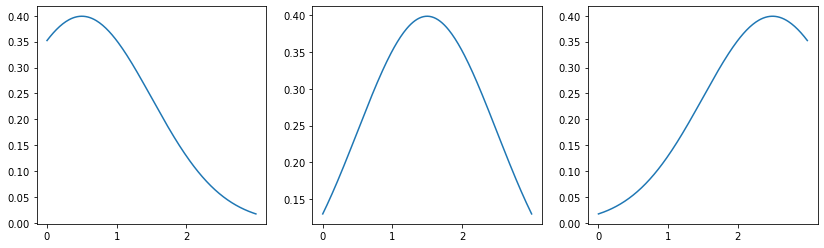

In [12]:
fig, ax = plt.subplots(1,3, figsize=(14,4), sharex=True)
for i in range(3):
    ax[i].set_xticks(np.arange(3))
x_data = np.linspace(0,3,200)
scale = 1
ax[0].plot(x_data, norm.pdf(x_data, 0.5, scale))
ax[1].plot(x_data, norm.pdf(x_data, 1.5, scale))
ax[2].plot(x_data, norm.pdf(x_data, 2.5, scale))
# ax[0].plot(np.clip(rng.normal(0.5, scale, 1000),0,2))
# ax[1].plot(np.clip(rng.normal(1, scale, 1000),0,2))
# ax[2].plot(np.clip(rng.normal(1.5, scale, 1000),0,2))
;

In [13]:
# Create 3 agents (0.5, 1, 1.5)
scale = 0.7
means = [0.5, 1.5, 2.5]

sample_n_blocks = 5
x_range = np.linspace(0, 3, 100)
# Every agent has a repertoire of 8 parts (one for every category + 5 special ones)
# Agent 0
p = softmax(norm.pdf(x_range, means[0], scale))
sampled_block_types = rng.choice(x_range, p=p, size=sample_n_blocks)




Text(0.5, 1.0, 'Example diversity of a single agent')

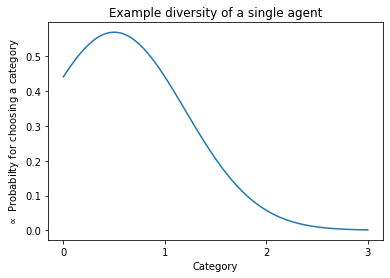

In [14]:
plt.plot(x_range, norm.pdf(x_range, means[0], scale))
plt.xticks([0,1,2,3])
plt.xlabel("Category")
plt.ylabel("$\propto$ Probabilty for choosing a category")
plt.title("Example diversity of a single agent")

In [15]:
sampled_block_types

array([0.90909091, 2.84848485, 1.3030303 , 0.78787879, 0.54545455])

In [16]:
class Agent:
    
    def __init__(self, diversity_mean, scale, decision_probability, monster, n_blocks=5):
        # self.rng = ...
        self.diversity_mean = diversity_mean
        self.diversity_scale = scale
        self.decision_probability = decision_probability
        
        self.heads = None
        self.bodies = None
        self.abilities = None
        
        self.proposal = None
        self.proposal_evaluations = []
        
        self._initialize_block_knowledge(monster, n_blocks)
    
    def _initialize_block_knowledge(self, monster, sample_n_blocks=5):
        # mandatory 1 block per category?
        x_range = np.linspace(0, 3, 30) # N_data_points = n_blocks
        p = softmax(norm.pdf(x_range, self.diversity_mean, self.diversity_scale), b=5)
        sampled_block_types = rng.choice(x_range, p=p, size=sample_n_blocks, replace=False)
        
        n_heads = np.sum(sampled_block_types<1)
        n_abilities = np.sum(sampled_block_types>2) 
        n_bodies = sample_n_blocks - n_abilities - n_heads
        
        self.heads = rng.choice(monster.all_blocks[0], n_heads, replace=False)
        self.bodies = rng.choice(monster.all_blocks[1], n_bodies, replace=False)
        self.abilities = rng.choice(monster.all_blocks[2], n_abilities, replace=False)
  
    def choose_proposal(self):
        if self.decision_probability >= rng.random():
            block_type = rng.integers(3)
            if block_type == 0 and len(self.heads)!= 0:
                self.proposal = [block_type, rng.choice(self.heads, p=softmax(self.heads[:,1]))]
            if block_type == 1 and len(self.bodies)!= 0:
                self.proposal = [block_type, rng.choice(self.bodies, p=softmax(self.bodies[:,1]))]
            if block_type == 2 and len(self.abilities)!= 0:
                self.proposal = [block_type, rng.choice(self.abilities, p=softmax(self.abilities[:,1]))]
        else:
            self.proposal = None
    
    def get_proposal_evaluations(self):
        return np.array(self.proposal_evaluations, dtype=object)
    
    def set_proposal_evaluations(self, evaluation):
        self.proposal_evaluations.append(evaluation)
    
    def reset_proposal_evaluations(self):
        self.proposal_evaluations = []
        

        


In [17]:
decision_probability = 0.5  # 1. Iteration all have the same

In [18]:
monster = Monster(n_blocks=10)

a0 = Agent(means[0], scale, decision_probability, monster)
a1 = Agent(means[1], scale, decision_probability, monster)
a2 = Agent(means[2], scale, decision_probability, monster)
agents = np.array([a0, a1, a2])
a1.heads, a1.bodies, a1.abilities

(array([[2.        , 0.18822234],
        [6.        , 0.83373914]]),
 array([[2.        , 0.55769683],
        [3.        , 0.03451226],
        [6.        , 0.08170868]]),
 array([], shape=(0, 2), dtype=float64))

### Information distribution

- Some agents propose a change to the monster
- Each agent vote on which part they may want to exchange
- Hinder information flow through the group:
    - Not every agent knows of every solution
    - Information about performance may be incorrectly communicated
- 

**What social networks may represent:**
- Communication paths
- Social influence path
- Probability of receiving information
- Uncertainty of information (Information theory/ Encoder-Channel-Decoder)

**Ideas**:
- Inforamtion needs to wander through the group. Every iteration, the information may travel one person forward

In [19]:
# Set up a monster to start with
# monster = Monster(n_blocks=10)
print(f"Initial (min) payoff: {monster.get_payoff()} with build {monster.get_build()}")


Initial (min) payoff: 0.04228389729881683 with build [8. 0. 6.]


In [20]:
# Social connections
# net = np.ones((3,3), dtype=int)
net = rng.random((3,3))
np.fill_diagonal(net, 1) # Remember their own ideas
print(net)

[[1.         0.32909304 0.06150983]
 [0.75583806 1.         0.44197957]
 [0.97357104 0.15087157 1.        ]]


In [21]:
# Proposing

# Decide if and which block they want to propose for change (based on softmax)
proposals = []
for a in agents:
    a.choose_proposal()
    print(a.proposal)

None
[0, array([6.        , 0.83373914])]
[1, array([8.        , 0.28703897])]


In [22]:
net > rng.random(3)

array([[ True, False, False],
       [False,  True,  True],
       [ True, False,  True]])

In [23]:
# Current solution 
current_payoff = monster.get_payoff()

# Communicate the proposal to others
for i,a in enumerate(agents):
    a.reset_proposal_evaluations()

for i,a in enumerate(agents):
    if a.proposal is not None:
        proposal_evaluation = monster.evaluate_proposal(a.proposal)
        net[i] > rng.random(3)
        for ag in agents[net[i] > rng.random(3)]:
            ag.set_proposal_evaluations([i, proposal_evaluation])
    
        

In [24]:
for a in agents:
    print(a.proposal_evaluations)

[[2, 0.29810567826405354]]
[[1, 0.8682626031561048]]
[[2, 0.29810567826405354]]


In [25]:
# Voting
votes = np.zeros(3)
for i, a in enumerate(agents):
    vote_for_agent =rng.choice(a.get_proposal_evaluations()[:,0], p=softmax(a.get_proposal_evaluations()[:,1].astype(float)))
    votes[vote_for_agent] += 1

winner_proposal = votes.argmax()
winner_proposal

2

In [26]:
# Applying vote
print(agents[winner_proposal].proposal)
if monster.evaluate_proposal(agents[winner_proposal].proposal) > monster.get_payoff():
    monster.update_block(agents[winner_proposal].proposal)

[1, array([8.        , 0.28703897])]


In [27]:
print(f"After one iteration payoff: {monster.get_payoff()} with build {monster.get_build()}")

After one iteration payoff: 0.29810567826405354 with build [8. 8. 6.]


**Multiple iterations**

In [28]:
def run_simulation(rng, iterations=30, n_agents=6, n_blocks=5, scale=0.7, decision_probability=0.5 , prints=False, blocks_per_category=10):

    # Set up a monster to start with
    monster = Monster(blocks_per_category)
    if prints:
        print(f"Initial (min) payoff: {round(monster.get_payoff(), 4)} with build {monster.get_build()}")

    # Set up agents
    means = rng.random(n_agents) * 3  # [0.5, 1.5, 2.5 , 1, 0, 3];
    agents = np.array([Agent(means[_], scale, decision_probability, monster, n_blocks) for _ in range(n_agents)])

    # Probability of information distribution
    net = rng.random((n_agents, n_agents))  # np.ones((n_agents, n_agents), dtype=int)
    np.fill_diagonal(net, 1) # Remember their own ideas

    
    # Temp
    
    
    # Run
    monster_value_tracker = np.zeros(iterations+1)
    monster_value_tracker[0] = monster.get_payoff()
    for it in range(iterations):

        # Prepare proposals
        proposals = []
        for a in agents:
            a.choose_proposal()

        # Distribute Info about proposals
        for a in agents:
            a.reset_proposal_evaluations()

        for i, a in enumerate(agents):
            if a.proposal is not None:
                proposal_evaluation = monster.evaluate_proposal(a.proposal)
                for ag in agents[net[i] > rng.random(n_agents)]: # agents[net[i].astype(bool)]:
                    ag.set_proposal_evaluations([i, proposal_evaluation])

        # Voting
        votes = np.zeros(n_agents)
        for i, a in enumerate(agents):
            proposal_evaluations = a.get_proposal_evaluations()
            if len(proposal_evaluations) != 0:
                vote_for_agent =rng.choice(
                    proposal_evaluations[:,0],
                    p=softmax(proposal_evaluations[:,1].astype(float))
                )
                votes[vote_for_agent] += 1
        winner_proposal = votes.argmax()

        # Applying vote
        if votes.sum() > 0 and monster.evaluate_proposal(agents[winner_proposal].proposal) > monster.get_payoff():
            monster.update_block(agents[winner_proposal].proposal)

        monster_value_tracker[it+1] = monster.get_payoff()
        if iterations <=20 and prints:
            print(f"Iteration {it} payoff: {round(monster.get_payoff(),4)}; build {monster.get_build()}")
        
    return monster_value_tracker, net

Initial (min) payoff: 0.1548 with build [8. 3. 8.]


''

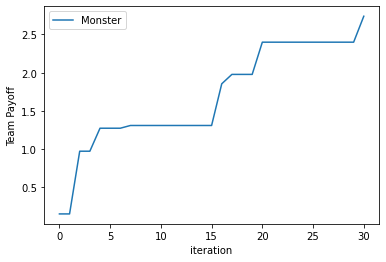

In [29]:
seed = np.random.randint(100)
rng = np.random.default_rng(seed)

iterations = 30

n_agents = 7
n_blocks = 7
scale = 0.5; 
decision_probability=0.3
blocks_per_category  = 10
prints = True

values, net = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability, prints, blocks_per_category)

plt.ylabel("Team Payoff")
plt.xlabel("iteration")
# plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.plot(values, label="Monster");
plt.legend()
;

''

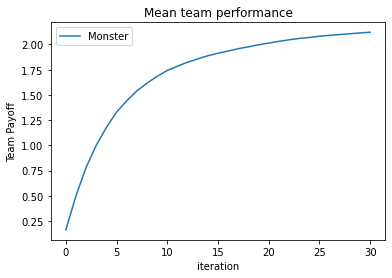

In [30]:
rng = np.random.default_rng(0)

n_simulations = 2000
iterations = 30

n_agents = 7
n_blocks = 7
scale = 0.5; 
decision_probability=0.5

all_values = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values[i_sim],  _ = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)


plt.title("Mean team performance")
plt.ylabel("Team Payoff")
plt.xlabel("iteration")
# plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.plot(all_values.mean(axis=0), label="Monster");
plt.legend()
;

''

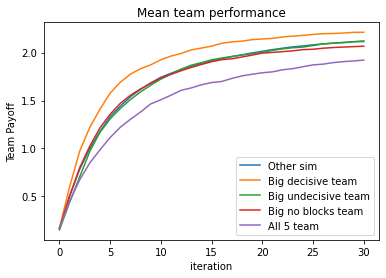

In [115]:
rng = np.random.default_rng(0)

n_simulations = 200
iterations = 30

n_agents = 8
n_blocks = 8
scale = 0.7; 
decision_probability=0.7

all_values_2 = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values_2[i_sim], _ = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)
##############

n_agents = 8
n_blocks = 8
scale = 0.7; 
decision_probability=0.3

all_values_3 = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values_3[i_sim], _ = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)
####################

n_agents = 8
n_blocks = 4
scale = 0.7; 
decision_probability=0.5

all_values_4 = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values_4[i_sim], _ = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)
########################
    
n_agents = 5
n_blocks = 5
scale = 0.5; 
decision_probability=0.5

all_values_5 = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values_5[i_sim], _ = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)
############################

plt.title("Mean team performance")
plt.ylabel("Team Payoff")
plt.xlabel("iteration")
# plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.plot(all_values.mean(axis=0), label="Other sim");
plt.plot(all_values_2.mean(axis=0), label="Big decisive team");
plt.plot(all_values_3.mean(axis=0), label="Big undecisive team");
plt.plot(all_values_4.mean(axis=0), label="Big no blocks team");
plt.plot(all_values_5.mean(axis=0), label="All 5 team");

plt.legend()
;

#### Dynamic social learning
Open questions:
- Should learning be based:
    - solely on behavioural data/ outcome
    - also on discrete features (having high XY -> positive reinforcement)
- How to build a objective activity & performance data basis to learn on
    - Communication is central component, but impacted by the social network which should be reinforced

Parameters:
- Some form of activity (biased by network connection)
- maybe directly see other agents attributes (discrete)(how many blocks, probability for activity, diversity)
- diversity parameter
- Quality of proposals (softmax inverse temperature?) 


Algorithms/ Techniques:
- Regression task (Baysian)
    - What would be the label?
    - Learn from payoff and amount of proposed changes?
    - Activity from other agents as data points 
    - Potential loss to minimize?
        - Some form of communication cost? (length of travel?)
- Maximum Likelihood/ Maximum a posteriori
    - P(activity| trust_parameters) 
    - Diversity to bias prior?
    - Is data iid?
    - MAP searches for the most likely $\theta$ given data. And is used to train predictors
        - We don't want to predict activity --> we want reinforcement of communication based on activity
- Reinforcement learning
    - Communication or voting success as feedback
    - Q-learning on activity as clue
        - ability to scale lr based on diversity
    - can RL integrate discrete features which would not impact behaviour?
        
- Bayes Network


    

Theory:
- Connections to leaders should get a high value (high probability/ trust/...)
- Positive correlations of 
    - MTL attribute
    - skill/ competence
    - communication (quantity/ quality)
- Leaders need to gather & distribute information
    - Connections in both directions high
    
    
- Low social values would indicate ostracism
    - No one trusts this agent and no one wants to listen to this agent

Network:
- Incoming and outgoing connections

| s | A1 | A2 | A3 |  
|---|---|---|---|
| A1 | 1 | 0 | 0 |  
| A2 | 0 | 1 | 0 |  
| A3 | 0 | 0 | 1 |  

- $s_{1,2}$: 
    - if high: Agent 1 is likely to communicate information to Agent 2
--> Only one matrix: Leaders need to convince others to give them information and at the same time be talkative to get own values high

Adaption of matrix values underlies:
- The agents talkativness/ willigness to distribute its information
- Reinforcement of the receiver to want information from an individual 
--> Each matrix value is impacted by sender and receiver: willingness to send and willigness to receive
    

#### Alternative communication & voting

##### Alternative Monster payoff
* Relating building blocks to each other
* One category = one dimension
* Agents can have perfect knowledge in one dimension (having a 1D utility function) but imperfect knowledge in the others

* --> Learn how the information feature correlates to the performance changes

Environment optimization algorithm:
* Hill climbing as team? 
    * proposals by evaluating neighbouring solutions for one dimension and proposing change in it
    * 5*5*5 = 125 possible solutions changing only to neighbours
    

Difficulty is the information distribution


In [5]:
from scipy.stats import multivariate_normal

In [37]:
grid_size = 5  # Solution space

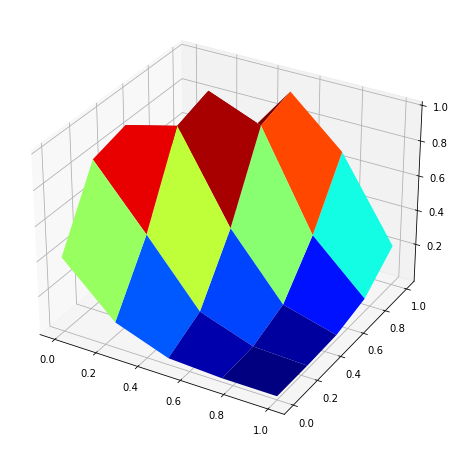

In [38]:
x = y = np.linspace(0, 1, grid_size)
xx, yy = np.meshgrid(x, y)
pos = np.dstack((xx, yy))

means = [0.3, .7]
cov = [[0.3, 0.1], [0.3, 0.4]]

prob = multivariate_normal(means, cov)
fitness_m = prob.pdf(pos) 
fitness_m = fitness_m * (1 / fitness_m.max())
# print(fitness_m.pdf(pos))

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.plot_surface(xx, yy, fitness_m, linewidth=0, cmap='jet', shade="false")

#### NK landscape

Example from https://link.springer.com/article/10.1186/s41469-018-0039-0

In [221]:
from itertools import product
import networkx as nx

In [212]:
# Interaction matrix
K = 1
N = 3
assert K+1 <= N
I = np.array([[1,0,1],[1,1,0],[0,1,1]])

print(I)

[[1 0 1]
 [1 1 0]
 [0 1 1]]


In [190]:
combs = np.array(list(product([0,1], repeat=K+1)))
combs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [166]:
C = np.zeros((N, len(combs),))
# Values from example
C[0] = np.array([0.9, .5, .3, .7])
C[1] = np.array([0.8, 0, 0, 0.3])
C[2] = np.array([.1, .5, .2, .9])
C

array([[0.9, 0.5, 0.3, 0.7],
       [0.8, 0. , 0. , 0.3],
       [0.1, 0.5, 0.2, 0.9]])

In [216]:
def create_C(N, K):
    C = np.random.random((N,2**(K+1))).round(1)
    return C

In [217]:
create_C(N, K)

array([[0.4, 0. , 0.7, 0.7],
       [0.9, 0.3, 0.1, 0.6],
       [0.8, 0.9, 0.8, 0.5]])

In [375]:
# TODO: Dependencies are always in same direction (make it random)
def create_dependency(N, K):
    """[:,0] is connected with [:,1] --> [0,1] would mean node 0 is has fluence on node 1"""
    assert N >= K+1
    depend = np.zeros((N*K, 2))
    x = np.arange(N)
    for _ in range(K):
        depend[:,0][N*_: N*_ +N] = x
        depend[:,1][N*_: N*_ +N] = np.roll(x,_+1)

    return depend.astype(int)

In [376]:
K=2
G = nx.random_k_out_graph(N, K, 1, self_loops=False)
nx.to_numpy_array(G).astype(int)

array([[0, 2, 0],
       [2, 0, 0],
       [1, 1, 0]])

In [377]:
N = 4
K = 2
create_dependency(N, K)

array([[0, 3],
       [1, 0],
       [2, 1],
       [3, 2],
       [0, 2],
       [1, 3],
       [2, 0],
       [3, 1]])

In [378]:
def f(v, conns, C):
    solution = []
    for i in range(len(conns)):
        for j, comb in enumerate(combs):
            if ([v[conns[i][0]], v[conns[i][1]]] == comb).all():
                solution.append(C[i][j])
    return solution, round(np.array(solution).mean(), 2)

In [379]:
v = np.array([1, 0, 0])
f(v, conns, C)

([0.9, 0.3, 0.0], 0.4)

In [383]:
N = 3
K = 2
C = create_C(N, K)
conns = create_dependency(N, K)

In [384]:
v = np.array([0, 1, 0])
f(v, conns, C)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [382]:
C, conns

(array([[0.8, 0.7, 0.3, 0.3],
        [0.5, 0.4, 0.1, 0.2],
        [0.4, 0.9, 0.4, 0.8]]),
 array([[0, 2],
        [1, 0],
        [2, 1]]))

How to understand it:
- Dependencies show which nodes are connected [0,1] means node zero impacts one
- C displays the value of connections
    - The first row is for the first node and the value of all its connections